# This notebook contains the following:

1.   Data Loading and Operations
2.   Using **XLM-R** for multilingual text classification
3.   Using **bert-base-multilinugal** for **zero-shot cross lingual transfer learning** with and without EDA augmentation.

Note:

*   According to the **EDA** [paper](https://arxiv.org/pdf/1901.11196.pdf), it is mentioned that this technique is effective only when dataset is small and won't give significant increase in performance with transformer based models. Hence, I directly went ahead with the XLM-R model which using only **10%** of the dataset, resulting in an accuracy of **63.9%**, which is **4%** greater than that given in the [paper](https://arxiv.org/pdf/2010.02573.pdf).
*   Since it was suggested in the challenge, I tried using BERT with EDA by applying it on the English reviews and performing cross lingual transfer on other langauges to gauge the performance.





## Data Loading and Operations

In [1]:
!pip install transformers
!pip install datasets

     |████████████████████████████████| 3.8 MB 7.1 MB/s 
     |████████████████████████████████| 596 kB 43.7 MB/s 
     |████████████████████████████████| 6.5 MB 42.0 MB/s 
     |████████████████████████████████| 895 kB 44.3 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 311 kB 8.2 MB/s 
     |████████████████████████████████| 212 kB 44.6 MB/s 
     |████████████████████████████████| 134 kB 62.9 MB/s 
     |████████████████████████████████| 1.1 MB 8.4 MB/s 
     |████████████████████████████████| 144 kB 54.2 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 271 kB 53.1 MB/s 


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
import numpy as np

In [2]:

from datasets import load_dataset, load_metric
dataset=load_dataset('amazon_reviews_multi')

Downloading:   0%|          | 0.00/2.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.62k [00:00<?, ?B/s]

No config specified, defaulting to: amazon_reviews_multi/all_languages


  0%|          | 0/6 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/90.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/82.0M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/77.5M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/81.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/169M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/109M [00:00<?, ?B/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/2.25M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.93M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.02M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.70M [00:00<?, ?B/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/2.26M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.05M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.21M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

  0%|          | 0/6 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset amazon_reviews_multi downloaded and prepared to /root/.cache/huggingface/datasets/amazon_reviews_multi/all_languages/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
dataset 
#There are 200,000 samples for each language in the training set with equal distribution of the stars.
#Following are the languages: English, Japanese, German, French, Spanish, and Chinese.


DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 1200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 30000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 30000
    })
})

In [ ]:
dataset['train'][0] #An example of how each sample from the dataset looks

{'language': 'de',
 'product_category': 'sports',
 'product_id': 'product_de_0865382',
 'review_body': 'Armband ist leider nach 1 Jahr kaputt gegangen',
 'review_id': 'de_0203609',
 'review_title': 'Leider nach 1 Jahr kaputt',
 'reviewer_id': 'reviewer_de_0267719',
 'stars': 1}

In [6]:
import pandas as pd
data=pd.DataFrame.from_dict(dataset['train'])

In [7]:
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,de_0203609,product_de_0865382,reviewer_de_0267719,1,Armband ist leider nach 1 Jahr kaputt gegangen,Leider nach 1 Jahr kaputt,de,sports
1,de_0559494,product_de_0678997,reviewer_de_0783625,1,In der Lieferung war nur Ein Akku!,EINS statt ZWEI Akkus!!!,de,home_improvement
2,de_0238777,product_de_0372235,reviewer_de_0911426,1,"Ein Stern, weil gar keine geht nicht. Es hande...",Achtung Abzocke,de,drugstore
3,de_0477884,product_de_0719501,reviewer_de_0836478,1,"Dachte, das wären einfach etwas festere Binden...",Zu viel des Guten,de,drugstore
4,de_0270868,product_de_0022613,reviewer_de_0736276,1,Meine Kinder haben kaum damit gespielt und nac...,Qualität sehr schlecht,de,toy


In [14]:
data1=data[['language','product_category','stars']]

In [15]:
data1

,language,product_category,stars
0,de,sports,1
1,de,home_improvement,1
2,de,drugstore,1
3,de,drugstore,1
4,de,toy,1
...,...,...,...
1199995,zh,baby_product,5
1199996,zh,book,5
1199997,zh,book,5
1199998,zh,pc,5


In [26]:
distribution_of_product_categories=data1.groupby(['language','product_category']).count()

In [27]:
distribution_of_product_categories.reset_index(inplace=True)

In [28]:
distribution_of_product_categories

,language,product_category,stars
0,de,apparel,10178
1,de,automotive,5321
2,de,baby_product,4070
3,de,beauty,7162
4,de,book,4927
...,...,...,...
177,zh,sports,6015
178,zh,toy,3670
179,zh,video_games,94
180,zh,watch,3133


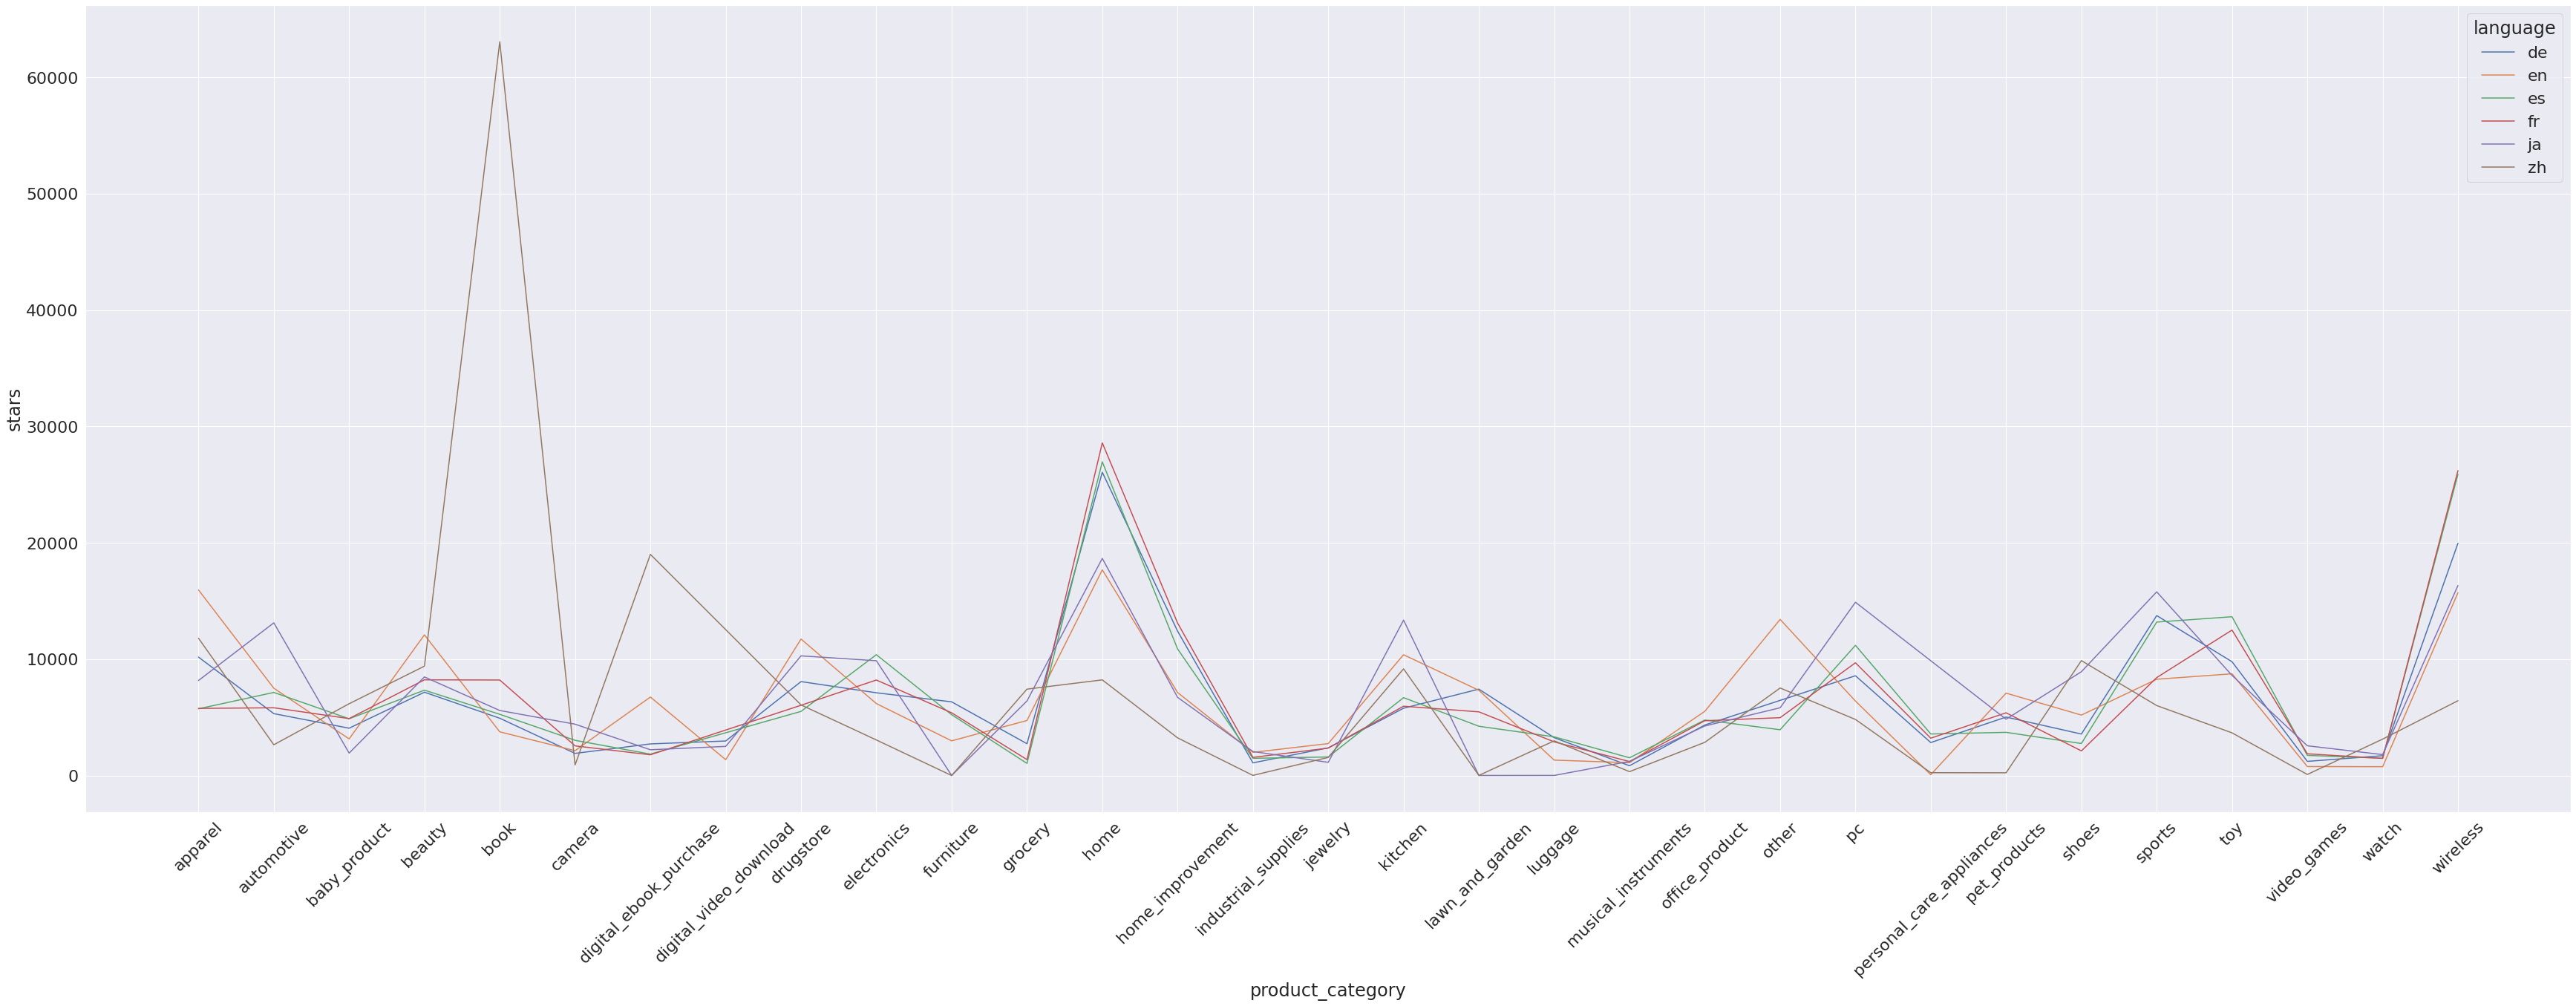

In [44]:
import seaborn as sns
import matplotlib.pylab as plt 
#sns.set(rc = {'figure.figsize':(60,20)})
plt.figure(figsize = (60,20))
sns.set(font_scale = 2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
sns.lineplot(data=distribution_of_product_categories, x="product_category", y="stars", hue="language")

It is seen that chinese reviews are skewed towards books and e-books

In [3]:
from collections import Counter
x=Counter(dataset['train']['product_category'])
x

Counter({'apparel': 57607,
         'automotive': 41564,
         'baby_product': 25098,
         'beauty': 52694,
         'book': 90806,
         'camera': 14949,
         'digital_ebook_purchase': 34321,
         'digital_video_download': 6840,
         'drugstore': 47716,
         'electronics': 44820,
         'furniture': 19952,
         'grocery': 23718,
         'home': 126177,
         'home_improvement': 53484,
         'industrial_supplies': 8209,
         'jewelry': 11783,
         'kitchen': 51349,
         'lawn_and_garden': 24486,
         'luggage': 13803,
         'musical_instruments': 6235,
         'office_product': 26458,
         'other': 42140,
         'pc': 55573,
         'personal_care_appliances': 9942,
         'pet_products': 26296,
         'shoes': 32440,
         'sports': 65436,
         'toy': 56951,
         'video_games': 8250,
         'watch': 10365,
         'wireless': 110538})

Due to the limitations in the computing resources, the dataset has been downsampled to 10% of the original size. For this purpose I have used **dataset.shard()**

In [6]:
do_shard = True
if do_shard:
    dataset = dataset.shuffle(seed=123)
    train_dataset = dataset["train"].shard(index=1, num_shards=10) 
    val_dataset = dataset['validation'].shard(index=1, num_shards=10)
    test_dataset = dataset["test"].shard(index=1, num_shards=10) 
else:
    train_dataset = dataset['train']
    val_dataset = dataset['validation']
    test_dataset = dataset['test']

In [8]:
train_dataset

Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 120000
})

In [9]:
val_dataset

Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 3000
})

In [ ]:
from collections import Counter
x = Counter(train_dataset['language'])
x
#the downsampled dataset is almost well balanced with almost equal proportions of all languages

Counter({'de': 19853,
         'en': 20028,
         'es': 19924,
         'fr': 19939,
         'ja': 19907,
         'zh': 20349})

In [ ]:
x = Counter(train_dataset['stars'])
x #Almost equal proportions of each star

Counter({1: 24072, 2: 23789, 3: 24009, 4: 24249, 5: 23881})

In [ ]:
x = Counter(val_dataset['language'])
x

Counter({'de': 492, 'en': 514, 'es': 500, 'fr': 522, 'ja': 458, 'zh': 514})

In [ ]:
x = Counter(val_dataset['stars'])
x

Counter({1: 611, 2: 578, 3: 611, 4: 609, 5: 591})

In [ ]:
x = Counter(test_dataset['language'])
x

Counter({'de': 509, 'en': 536, 'es': 462, 'fr': 464, 'ja': 510, 'zh': 519})

In [ ]:
x = Counter(test_dataset['stars'])
x

Counter({1: 604, 2: 584, 3: 615, 4: 587, 5: 610})

## XLM-R Approach

In [ ]:
from transformers import AutoTokenizer
model_checkpoint = 'xlm-roberta-base'
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

We need to preprocess the data before using it for classification. This is done by a Tokenizer which will tokenize the inputs (including converting the tokens to their corresponding IDs in the pretrained vocabulary) and put it in a format the model expects, as well as create the other inputs that model requires.

For this we use the AutoTokenizer to get a tokenizer corresponding to the model architecture.

In [ ]:
import torch
max_len = 512
pad_to_max = False
def tokenize_data(ex_dataset):
    #Concatenating review body with review_title and product_category for performance boost and then tokenizing and encoding them
    text_ = ex_dataset['review_body'] + " " + ex_dataset['review_title'] + " " + ex_dataset['product_category']
    encodings = tokenizer.encode_plus(text_, pad_to_max_length=pad_to_max, max_length=max_len,
                                           add_special_tokens=True,
                                            return_token_type_ids=False,
                                            return_attention_mask=True,
                                            return_overflowing_tokens=False,
                                            return_special_tokens_mask=False,
                                           )
    
    # Subtract 1 from labels to have them in range 0-4
    targets = torch.tensor(ex_dataset['stars']-1,dtype=torch.long)
    

    encodings.update({'labels': targets})
    return encodings



In [ ]:
encoded_train_dataset = list(map(tokenize_data,train_dataset)) #encoding the dataset by mapping the tokenize function to each sample in the dataset
encoded_val_dataset = list(map(tokenize_data,val_dataset))
encoded_test_dataset = list(map(tokenize_data,test_dataset))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


### Dynamic Padding for faster training
To reduce training time dynamic padding has been leveraged where each sentence in a batch is padded to the max length of a sentence in that particular batch. Otherwise even if a sentence having only 20 tokens is padded to 512 which is the maximum length allowed by the model , the training will slow down significantly since attention is quadratic in computation.

In [ ]:
def pad_seq(seq,max_batch_len, pad_value):
  return seq + (max_batch_len - len(seq))*[pad_value]

In [ ]:
from dataclasses import dataclass, field
from transformers import DataCollator
@dataclass
class SmartCollator():
  pad_token_id: int

  def __call__(self, batch):
    batch_inputs = list()
    batch_attention_masks = list()
    labels = list()
    max_size = max([len(ex['input_ids']) for ex in batch])
    for item in batch:
        batch_inputs += [pad_seq(item['input_ids'], max_size, self.pad_token_id)]
        batch_attention_masks += [pad_seq(item['attention_mask'], max_size, 0)]
        labels.append(item['labels'])
    return {"input_ids": torch.tensor(batch_inputs, dtype=torch.long),
            "attention_mask": torch.tensor(batch_attention_masks, dtype=torch.long),
            "labels": torch.tensor(labels, dtype=torch.long)
            }      

### Loading model and training

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
batch_size = 16
num_labels = 5
#Importing the XLM-Roberta model which has been pre-trained on 100 different languages and has proven to outperform multilingual BERT
model_name = 'xlm-roberta-base'
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

In [ ]:
metric_name = "accuracy"

args = TrainingArguments(  #Defining Training arguments
    output_dir = "test-results-concat", #Storing model checkpoints 
    seed = 123, 
    evaluation_strategy = "steps",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True, #During evaluation the model with highest accuracy will be loaded.
    metric_for_best_model=metric_name,
    eval_steps = 5000,
    save_steps = 5000,
    fp16 = True

)

In [ ]:
metric = load_metric('accuracy')
metric

Downloading:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

Metric(name: "accuracy", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions: Predicted labels, as returned by a model.
    references: Ground truth labels.
    normalize: If False, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    sample_weight: Sample weights.
Returns:
    accuracy: Accuracy score.
Examples:

    >>> accuracy_metric = datasets.load_metric("accuracy")
    >>> results = accuracy_metric.compute(references=[0, 1], predictions=[0, 1])
    >>> print(results)
    {'accuracy': 1.0}
""", stored examples: 0)

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
 
    predictions = np.argmax(predictions, axis=1)

    return metric.compute(predictions=predictions, references=labels)

In [ ]:
validation_key = "validation"
trainer = Trainer(  #Defining the Trainer class provides an API for feature-complete training in PyTorch for most standard use cases
    model,
    args,
    train_dataset= encoded_train_dataset, #Using full downsampled train dataset
    eval_dataset=encoded_val_dataset, #Evaluating on validation dataset while training
    data_collator=SmartCollator(pad_token_id=tokenizer.pad_token_id),
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Using amp half precision backend


In [ ]:
trainer.train() #training

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 120000
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 22500


Step,Training Loss,Validation Loss,Accuracy
5000,0.951700,0.948175,0.578667
10000,0.870900,0.941479,0.603333
15000,0.849500,0.910967,0.601000
20000,0.777800,0.947831,0.599333


***** Running Evaluation *****
  Num examples = 3000
  Batch size = 16
Saving model checkpoint to test-results-concat/checkpoint-5000
Configuration saved in test-results-concat/checkpoint-5000/config.json
Model weights saved in test-results-concat/checkpoint-5000/pytorch_model.bin
tokenizer config file saved in test-results-concat/checkpoint-5000/tokenizer_config.json
Special tokens file saved in test-results-concat/checkpoint-5000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 3000
  Batch size = 16
Saving model checkpoint to test-results-concat/checkpoint-10000
Configuration saved in test-results-concat/checkpoint-10000/config.json
Model weights saved in test-results-concat/checkpoint-10000/pytorch_model.bin
tokenizer config file saved in test-results-concat/checkpoint-10000/tokenizer_config.json
Special tokens file saved in test-results-concat/checkpoint-10000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 3000
  Batch size = 16
Savi

TrainOutput(global_step=22500, training_loss=0.8866369601779513, metrics={'train_runtime': 7192.8295, 'train_samples_per_second': 50.05, 'train_steps_per_second': 3.128, 'total_flos': 2.842024570149965e+16, 'train_loss': 0.8866369601779513, 'epoch': 3.0})

In [ ]:
trainer.evaluate() #Checking to see if model with highest accuracy is returned

***** Running Evaluation *****
  Num examples = 3000
  Batch size = 16


{'epoch': 3.0,
 'eval_accuracy': 0.6033333333333334,
 'eval_loss': 0.9414786696434021,
 'eval_runtime': 17.4889,
 'eval_samples_per_second': 171.537,
 'eval_steps_per_second': 10.75}

### Evaluation on Test Set

In [ ]:
trainer.evaluate(encoded_test_dataset) #evaluating performance on test dataset. The accuracy is 63.9%

***** Running Evaluation *****
  Num examples = 3000
  Batch size = 16


{'epoch': 3.0,
 'eval_accuracy': 0.639,
 'eval_loss': 0.9031120538711548,
 'eval_runtime': 17.1355,
 'eval_samples_per_second': 175.075,
 'eval_steps_per_second': 10.971}

## Multilingual BERT 

Downsampled Dataset i.e. only 10% of the entire dataset

In [ ]:
train_dataset

Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 120000
})

In [ ]:
val_dataset

Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 3000
})

In [ ]:
test_dataset

Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 3000
})

In [10]:
from transformers import AutoTokenizer #Importing tokenizer
model_name = 'bert-base-multilingual-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True) #use_fast=True to use the fast tokenizers 

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

In [11]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
batch_size = 16
num_labels = 5 #5 labels since we have only 5 stars
#Importing the Multilingual BERT model

model_name = 'bert-base-multilingual-uncased'
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

Downloading:   0%|          | 0.00/641M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

In [12]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

### Zero-shot cross lingual transfer without Easy Data Augmentation. 
Using English as source language

In [16]:
filter_english_dataset=[] 

In [17]:
for i in range(len(train_dataset)): #Creating a dataset containing only english reviews since english will be source dataset for this experiment
  if(train_dataset[i]['language']=='en'):
    filter_english_dataset.append(train_dataset[i])
  else:
    continue

We need to preprocess the data before using it for classification. This is done by a Tokenizer which will tokenize the inputs (including converting the tokens to their corresponding IDs in the pretrained vocabulary) and put it in a format the model expects, as well as create the other inputs that model requires.

For this we use the AutoTokenizer to get a tokenizer corresponding to the model architecture.

In [ ]:
max_len = 512
pad_to_max = False
def tokenize_data(ex_dataset):
    text_ = ex_dataset['review_body'] + " " + ex_dataset['review_title'] + " " + ex_dataset['product_category']
    encodings = tokenizer.encode_plus(text_, pad_to_max_length=pad_to_max, max_length=max_len,
                                           add_special_tokens=True,
                                            return_token_type_ids=False,
                                            return_attention_mask=True,
                                            return_overflowing_tokens=False,
                                            return_special_tokens_mask=False,
                                           )
    
    # Subtract 1 from labels to have them in range 0-4
    targets = torch.tensor(ex_dataset['stars']-1,dtype=torch.long)
    

    encodings.update({'labels': targets})
    return encodings


In [ ]:
encode_filter_train_dataset = list(map(tokenize_data,filter_english_dataset)) #Tokenizing and encoding data before we feed it in the model

In [ ]:
#encoded_train_dataset = list(map(tokenize_data,train_dataset))
encoded_val_dataset = list(map(tokenize_data,val_dataset))
encoded_test_dataset = list(map(tokenize_data,test_dataset))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Dynamic Padding

In [ ]:
def pad_seq(seq,max_batch_len, pad_value):
  return seq + (max_batch_len - len(seq))*[pad_value]

In [ ]:
from dataclasses import dataclass, field #Smart Data collator to perform padding of sentences batchwise where the max seq length of a sentence
                                        # would be calculated for a given batch and each sentence in that batch would padded till that length.
from transformers import DataCollator
@dataclass
class SmartCollator():
  pad_token_id: int

  def __call__(self, batch):
    batch_inputs = list()
    batch_attention_masks = list()
    labels = list()
    max_size = max([len(ex['input_ids']) for ex in batch])
    for item in batch:
        batch_inputs += [pad_seq(item['input_ids'], max_size, self.pad_token_id)]
        batch_attention_masks += [pad_seq(item['attention_mask'], max_size, 0)]
        labels.append(item['labels'])
    return {"input_ids": torch.tensor(batch_inputs, dtype=torch.long),
            "attention_mask": torch.tensor(batch_attention_masks, dtype=torch.long),
            "labels": torch.tensor(labels, dtype=torch.long)
            }      

In [48]:
metric = load_metric('accuracy')
metric

Downloading:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

Metric(name: "accuracy", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions: Predicted labels, as returned by a model.
    references: Ground truth labels.
    normalize: If False, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    sample_weight: Sample weights.
Returns:
    accuracy: Accuracy score.
Examples:

    >>> accuracy_metric = datasets.load_metric("accuracy")
    >>> results = accuracy_metric.compute(references=[0, 1], predictions=[0, 1])
    >>> print(results)
    {'accuracy': 1.0}
""", stored examples: 0)

In [ ]:
metric_name = "accuracy"

args = TrainingArguments(
    output_dir = "test-results-concat",
    seed = 123, 
    evaluation_strategy = "steps",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    eval_steps = 5000,
    save_steps = 5000,
    fp16 = True

)

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
 
    predictions = np.argmax(predictions, axis=1)

    return metric.compute(predictions=predictions, references=labels)

In [ ]:
validation_key = "validation"
trainer = Trainer(
    model,
    args,
    train_dataset= encode_filter_train_dataset, #training on english reviews subset
    eval_dataset=encoded_val_dataset, #evaluating on validation set
    data_collator=SmartCollator(pad_token_id=tokenizer.pad_token_id),
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Using amp half precision backend


In [ ]:
trainer.train() #Training

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 20028
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3756


Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=3756, training_loss=0.8425639947763266, metrics={'train_runtime': 913.7037, 'train_samples_per_second': 65.759, 'train_steps_per_second': 4.111, 'total_flos': 4903001023767840.0, 'train_loss': 0.8425639947763266, 'epoch': 3.0})

In [ ]:
trainer.evaluate(encoded_test_dataset) #Fine grained classification accuracy on test set is 46% which is 2 % more than given in the paper

***** Running Evaluation *****
  Num examples = 3000
  Batch size = 16


{'epoch': 3.0,
 'eval_accuracy': 0.46,
 'eval_loss': 1.3669873476028442,
 'eval_runtime': 13.4957,
 'eval_samples_per_second': 222.293,
 'eval_steps_per_second': 13.93}

###Zero-shot cross lingual transfer with Easy Data Augmentation.
Using English as source language.

In [14]:
import pandas as pd

In [18]:
df = pd.DataFrame(filter_english_dataset) #filter_english_dataset is the dataset contatining only english reviews from the downsampled dataset.
df

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0807143,product_en_0971943,reviewer_en_0699711,2,I’ve had good luck with this product when I’ve...,I’ve had good luck with this product when I’ve...,en,beauty
1,en_0629390,product_en_0591953,reviewer_en_0604703,1,Received broken and missing parts,Damaged Order,en,wireless
2,en_0145039,product_en_0987577,reviewer_en_0987446,1,This no longer comes with gift boxes as market...,NO MORE GIFT BOXES,en,home
3,en_0342255,product_en_0481239,reviewer_en_0333557,4,I love it!!!! only thing is four of the pages ...,Blurry pages,en,book
4,en_0245107,product_en_0049742,reviewer_en_0179108,2,I loved this product until the arm snapped in ...,Breaks easily,en,wireless
...,...,...,...,...,...,...,...,...
20023,en_0365408,product_en_0837204,reviewer_en_0513046,5,These are great. Great for hanging string lights.,Great buy,en,home_improvement
20024,en_0239379,product_en_0026808,reviewer_en_0044862,3,"Really like this product, but as seen in the p...","Great product, required modification. 😕",en,office_product
20025,en_0085727,product_en_0193628,reviewer_en_0000860,1,Worst purchase on amazon in an entire year. 1....,Worst purchase on amazon in an entire year,en,beauty
20026,en_0942249,product_en_0376379,reviewer_en_0090845,1,Did not work! Had to return and get $ money = ...,I would not recommend.,en,kitchen


In [19]:
df=df[['review_title','product_category']] #Keeping only product category and review_title

In [20]:
df

,review_title,product_category
0,I’ve had good luck with this product when I’ve...,beauty
1,Damaged Order,wireless
2,NO MORE GIFT BOXES,home
3,Blurry pages,book
4,Breaks easily,wireless
...,...,...
20023,Great buy,home_improvement
20024,"Great product, required modification. 😕",office_product
20025,Worst purchase on amazon in an entire year,beauty
20026,I would not recommend.,kitchen


In [21]:
df_copy=df.copy() #Making a copy of the dataframe

In [22]:
df_copy=pd.concat([df_copy]*5) #Creating 4 more duplicates of each sample to match the count with the augmented review dataset.
#EDA has been performed on the english reviews where each sample is augmented with 4 more samples having variations in text. 

In [24]:
df_copy.sort_index(inplace=True)

In [25]:
df_copy

,review_title,product_category
0,I’ve had good luck with this product when I’ve...,beauty
0,I’ve had good luck with this product when I’ve...,beauty
0,I’ve had good luck with this product when I’ve...,beauty
0,I’ve had good luck with this product when I’ve...,beauty
0,I’ve had good luck with this product when I’ve...,beauty
...,...,...
20027,Expected stronger vibration on bristles (I thi...,drugstore
20027,Expected stronger vibration on bristles (I thi...,drugstore
20027,Expected stronger vibration on bristles (I thi...,drugstore
20027,Expected stronger vibration on bristles (I thi...,drugstore


In [26]:
df_copy.reset_index(inplace=True)

In [27]:
df_copy.drop(['index'],axis=1,inplace=True)

In [28]:
df_copy.head(10)

,review_title,product_category
0,I’ve had good luck with this product when I’ve...,beauty
1,I’ve had good luck with this product when I’ve...,beauty
2,I’ve had good luck with this product when I’ve...,beauty
3,I’ve had good luck with this product when I’ve...,beauty
4,I’ve had good luck with this product when I’ve...,beauty
5,Damaged Order,wireless
6,Damaged Order,wireless
7,Damaged Order,wireless
8,Damaged Order,wireless
9,Damaged Order,wireless


**Performed EDA (Easy Data Augmentation) on the eda_dataset(english) using the command line by downloading the files from the github [repository](https://github.com/jasonwei20/eda_nlp)**
The eda_dataset.txt was augmented and then renamed as aug_eda_dataset.tx

In [29]:
read_file = pd.read_csv (r'/content/aug_eda_dataset.txt', sep='\t')
read_file.to_csv (r'/content/aug_eda_dataset.csv', index=None) #Converting text to csv

In [30]:
df1=pd.read_csv('/content/aug_eda_dataset.csv')

In [31]:
df1.head(10) #each review has 4 other augmented sentences.

,labels,review_body
0,2,ive had good polish luck with this product whe...
1,2,me had good money with this product when ive b...
2,2,off had good luck with this product shop ive b...
3,2,ive had trade good luck with this product when...
4,2,ive had good luck with this product when ive b...
5,1,and broken received missing parts
6,1,share received broken and missing parts
7,1,received and missing
8,1,received broken and missing parts
9,1,received broken and missing parts


In [32]:
train_df=pd.concat([df1,df_copy],axis=1) #Concatenating the augmented dataset with the review_title and product_category dataframe to create new training set

In [33]:
train_df

,labels,review_body,review_title,product_category
0,2,ive had good polish luck with this product whe...,I’ve had good luck with this product when I’ve...,beauty
1,2,me had good money with this product when ive b...,I’ve had good luck with this product when I’ve...,beauty
2,2,off had good luck with this product shop ive b...,I’ve had good luck with this product when I’ve...,beauty
3,2,ive had trade good luck with this product when...,I’ve had good luck with this product when I’ve...,beauty
4,2,ive had good luck with this product when ive b...,I’ve had good luck with this product when I’ve...,beauty
...,...,...,...,...
100135,4,expected stronger vibration else its fine usin...,Expected stronger vibration on bristles (I thi...,drugstore
100136,4,expected stronger vibration else its fine usin...,Expected stronger vibration on bristles (I thi...,drugstore
100137,4,stronger vibration else its fine using for les...,Expected stronger vibration on bristles (I thi...,drugstore
100138,4,expected stronger now else its fine using for ...,Expected stronger vibration on bristles (I thi...,drugstore


As you can see above, after augmentation the number of samples went from 20028 to 100140 samples 

In [35]:
train_df.rename(columns={'labels':'stars'},inplace=True)

In [36]:
train_df.head()

,stars,review_body,review_title,product_category
0,2,ive had good polish luck with this product whe...,I’ve had good luck with this product when I’ve...,beauty
1,2,me had good money with this product when ive b...,I’ve had good luck with this product when I’ve...,beauty
2,2,off had good luck with this product shop ive b...,I’ve had good luck with this product when I’ve...,beauty
3,2,ive had trade good luck with this product when...,I’ve had good luck with this product when I’ve...,beauty
4,2,ive had good luck with this product when ive b...,I’ve had good luck with this product when I’ve...,beauty


In [37]:
train_dataframe = train_df.to_dict('records') #Converting dataframe to list of dictionary

We need to preprocess the data before using it for classification. This is done by a Tokenizer which will tokenize the inputs (including converting the tokens to their corresponding IDs in the pretrained vocabulary) and put it in a format the model expects, as well as create the other inputs that model requires.

For this we use the AutoTokenizer to get a tokenizer corresponding to the model architecture.

In [39]:
max_len = 512
pad_to_max = False
def tokenize_data(ex_dataset):
    text_ = ex_dataset['review_body'] + " " + ex_dataset['review_title'] + " " + ex_dataset['product_category'] #Concatenating these features since it boosts classification accuracy.
    encodings = tokenizer.encode_plus(text_, pad_to_max_length=pad_to_max, max_length=max_len,
                                           add_special_tokens=True,
                                            return_token_type_ids=False,
                                            return_attention_mask=True,
                                            return_overflowing_tokens=False,
                                            return_special_tokens_mask=False,
                                           )
    
    # Subtract 1 from labels to have them in range 0-4
    targets = torch.tensor(ex_dataset['stars']-1,dtype=torch.long)
    

    encodings.update({'labels': targets})
    return encodings

In [40]:
encoding_train = list(map(tokenize_data,train_dataframe)) #Tokenizing and encoding the text by mapping the function to each sample in the training set

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [41]:
encoded_val_dataset = list(map(tokenize_data,val_dataset)) #Tokenizing and encoding the text by mapping the function to each sample in the training set
encoded_test_dataset = list(map(tokenize_data,test_dataset)) #Tokenizing and encoding the text by mapping the function to each sample in the training set

In [42]:
def pad_seq(seq,max_batch_len, pad_value):
  return seq + (max_batch_len - len(seq))*[pad_value]

In [43]:
from dataclasses import dataclass, field#Smart Data collator to perform padding of sentences batchwise where the max seq length of a sentence
                                        # would be calculated for a given batch and each sentence in that batch would padded till that length.
from transformers import DataCollator     
@dataclass
class SmartCollator():
  pad_token_id: int

  def __call__(self, batch):
    batch_inputs = list()
    batch_attention_masks = list()
    labels = list()
    max_size = max([len(ex['input_ids']) for ex in batch])
    for item in batch:
        batch_inputs += [pad_seq(item['input_ids'], max_size, self.pad_token_id)]
        batch_attention_masks += [pad_seq(item['attention_mask'], max_size, 0)]
        labels.append(item['labels'])
    return {"input_ids": torch.tensor(batch_inputs, dtype=torch.long),
            "attention_mask": torch.tensor(batch_attention_masks, dtype=torch.long),
            "labels": torch.tensor(labels, dtype=torch.long)
            }      

In [49]:
metric = load_metric('accuracy')
metric

Metric(name: "accuracy", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions: Predicted labels, as returned by a model.
    references: Ground truth labels.
    normalize: If False, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    sample_weight: Sample weights.
Returns:
    accuracy: Accuracy score.
Examples:

    >>> accuracy_metric = datasets.load_metric("accuracy")
    >>> results = accuracy_metric.compute(references=[0, 1], predictions=[0, 1])
    >>> print(results)
    {'accuracy': 1.0}
""", stored examples: 0)

In [44]:
metric_name = "accuracy"        #Using accuracy as the metric
                                #Defining Training arguments   
args = TrainingArguments(
    output_dir = "test-results-concat",
    seed = 123, 
    evaluation_strategy = "steps",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True, #After training the best model i.e. having highest classification accuracy will be used for evaluating on test set
    metric_for_best_model=metric_name,  #metric name is accuracy
    eval_steps = 5000,
    save_steps = 5000,
    fp16 = True

)

In [45]:
def compute_metrics(eval_pred):  
    predictions, labels = eval_pred
 
    predictions = np.argmax(predictions, axis=1)

    return metric.compute(predictions=predictions, references=labels)

In [46]:
validation_key = "validation"            
trainer = Trainer(     #The Trainer class provides an API for feature-complete training in PyTorch for most standard use cases
    model,
    args,
    train_dataset= encoding_train, #Training on augmented english dataset.
    eval_dataset=encoded_val_dataset,#evaluating on validation dataset
    data_collator=SmartCollator(pad_token_id=tokenizer.pad_token_id), #padding sentences to max length of a batch and not entire dataset.
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

Using amp half precision backend


In [50]:
trainer.train() #Training

***** Running training *****
  Num examples = 100140
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 18777


Step,Training Loss,Validation Loss,Accuracy
5000,0.371300,2.044297,0.412000
10000,0.175400,3.059865,0.411000
15000,0.090800,3.560361,0.413333


***** Running Evaluation *****
  Num examples = 3000
  Batch size = 16


Step,Training Loss,Validation Loss


Saving model checkpoint to test-results-concat/checkpoint-5000
Configuration saved in test-results-concat/checkpoint-5000/config.json
Model weights saved in test-results-concat/checkpoint-5000/pytorch_model.bin
tokenizer config file saved in test-results-concat/checkpoint-5000/tokenizer_config.json
Special tokens file saved in test-results-concat/checkpoint-5000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 3000
  Batch size = 16
Saving model checkpoint to test-results-concat/checkpoint-10000
Configuration saved in test-results-concat/checkpoint-10000/config.json
Model weights saved in test-results-concat/checkpoint-10000/pytorch_model.bin
tokenizer config file saved in test-results-concat/checkpoint-10000/tokenizer_config.json
Special tokens file saved in test-results-concat/checkpoint-10000/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 3000
  Batch size = 16
Saving model checkpoint to test-results-concat/checkpoint-15000
Configurati

TrainOutput(global_step=18777, training_loss=0.23853848070269698, metrics={'train_runtime': 5186.4998, 'train_samples_per_second': 57.923, 'train_steps_per_second': 3.62, 'total_flos': 2.232903603613219e+16, 'train_loss': 0.23853848070269698, 'epoch': 3.0})

In [51]:
trainer.evaluate(encoded_test_dataset) #Accuracy of 41.8% on test set. 

***** Running Evaluation *****
  Num examples = 3000
  Batch size = 16


{'epoch': 3.0,
 'eval_accuracy': 0.418,
 'eval_loss': 3.5510618686676025,
 'eval_runtime': 19.5115,
 'eval_samples_per_second': 153.756,
 'eval_steps_per_second': 9.635}

# Results
Using only 10% of the dataset for training validation and testing:

1.   XLM-R model performs the best with 63.9% accuracy which is more than that given in the paper (59.2%)
2.   Multilingual BERT model with zero-shot cross lingual transfer approach i.e. training only on English and testing on all datasets gave an accuracy of 46%.
3. Augmenting the english training set with Easy Data Augmentation technique and using mBERT did not give a performance boost. Instead the accuracy achieved was around 41.8%. This can be expected since it is mentioned in the EDA paper that their augmentation technique is suitable for very small datasets and the performance gain will be insignificant if transformer models are used for classfication.



# Notes to improve performance


*   Have concatenated Product_category, review_title and review_body for increase in accuracy score as done in the paper.
*   Instead of padding to max sequence length, I implemented dynamic padding i.e. padding sentences based on the max sequence length of a batch.
*   Performing Hyperparameter tuning using [Optuna](https://optuna.org/) can further improve the model performance.
*   Provided one has the computational resources, training on the entire corpus can further improve the performance.
*   EDA can work better if we select even smaller subset of dataset (500 or 1000 reviews),however it may not be beneficial if we are using transformer models.









